# Module 3 Homework: Classification
By Shanice Williams

In [2]:
# imports
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.


In [3]:
df = pd.read_csv('./data/course_lead_scoring.csv')

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [6]:
for cat in categorical_columns:
    df[cat] = df[cat].fillna('NA')

In [7]:
df.isnull().sum()

lead_source                   0
industry                      0
number_of_courses_viewed      0
annual_income               181
employment_status             0
location                      0
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [8]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
numerical_columns

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score',
 'converted']

In [9]:
for num in numerical_columns:
    df[num] = df[num].fillna(0.0)

In [10]:
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [11]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail` [X]

In [12]:
df.industry.mode()

0    retail
Name: industry, dtype: object

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`[X]

Only consider the pairs above when answering this question.

In [13]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

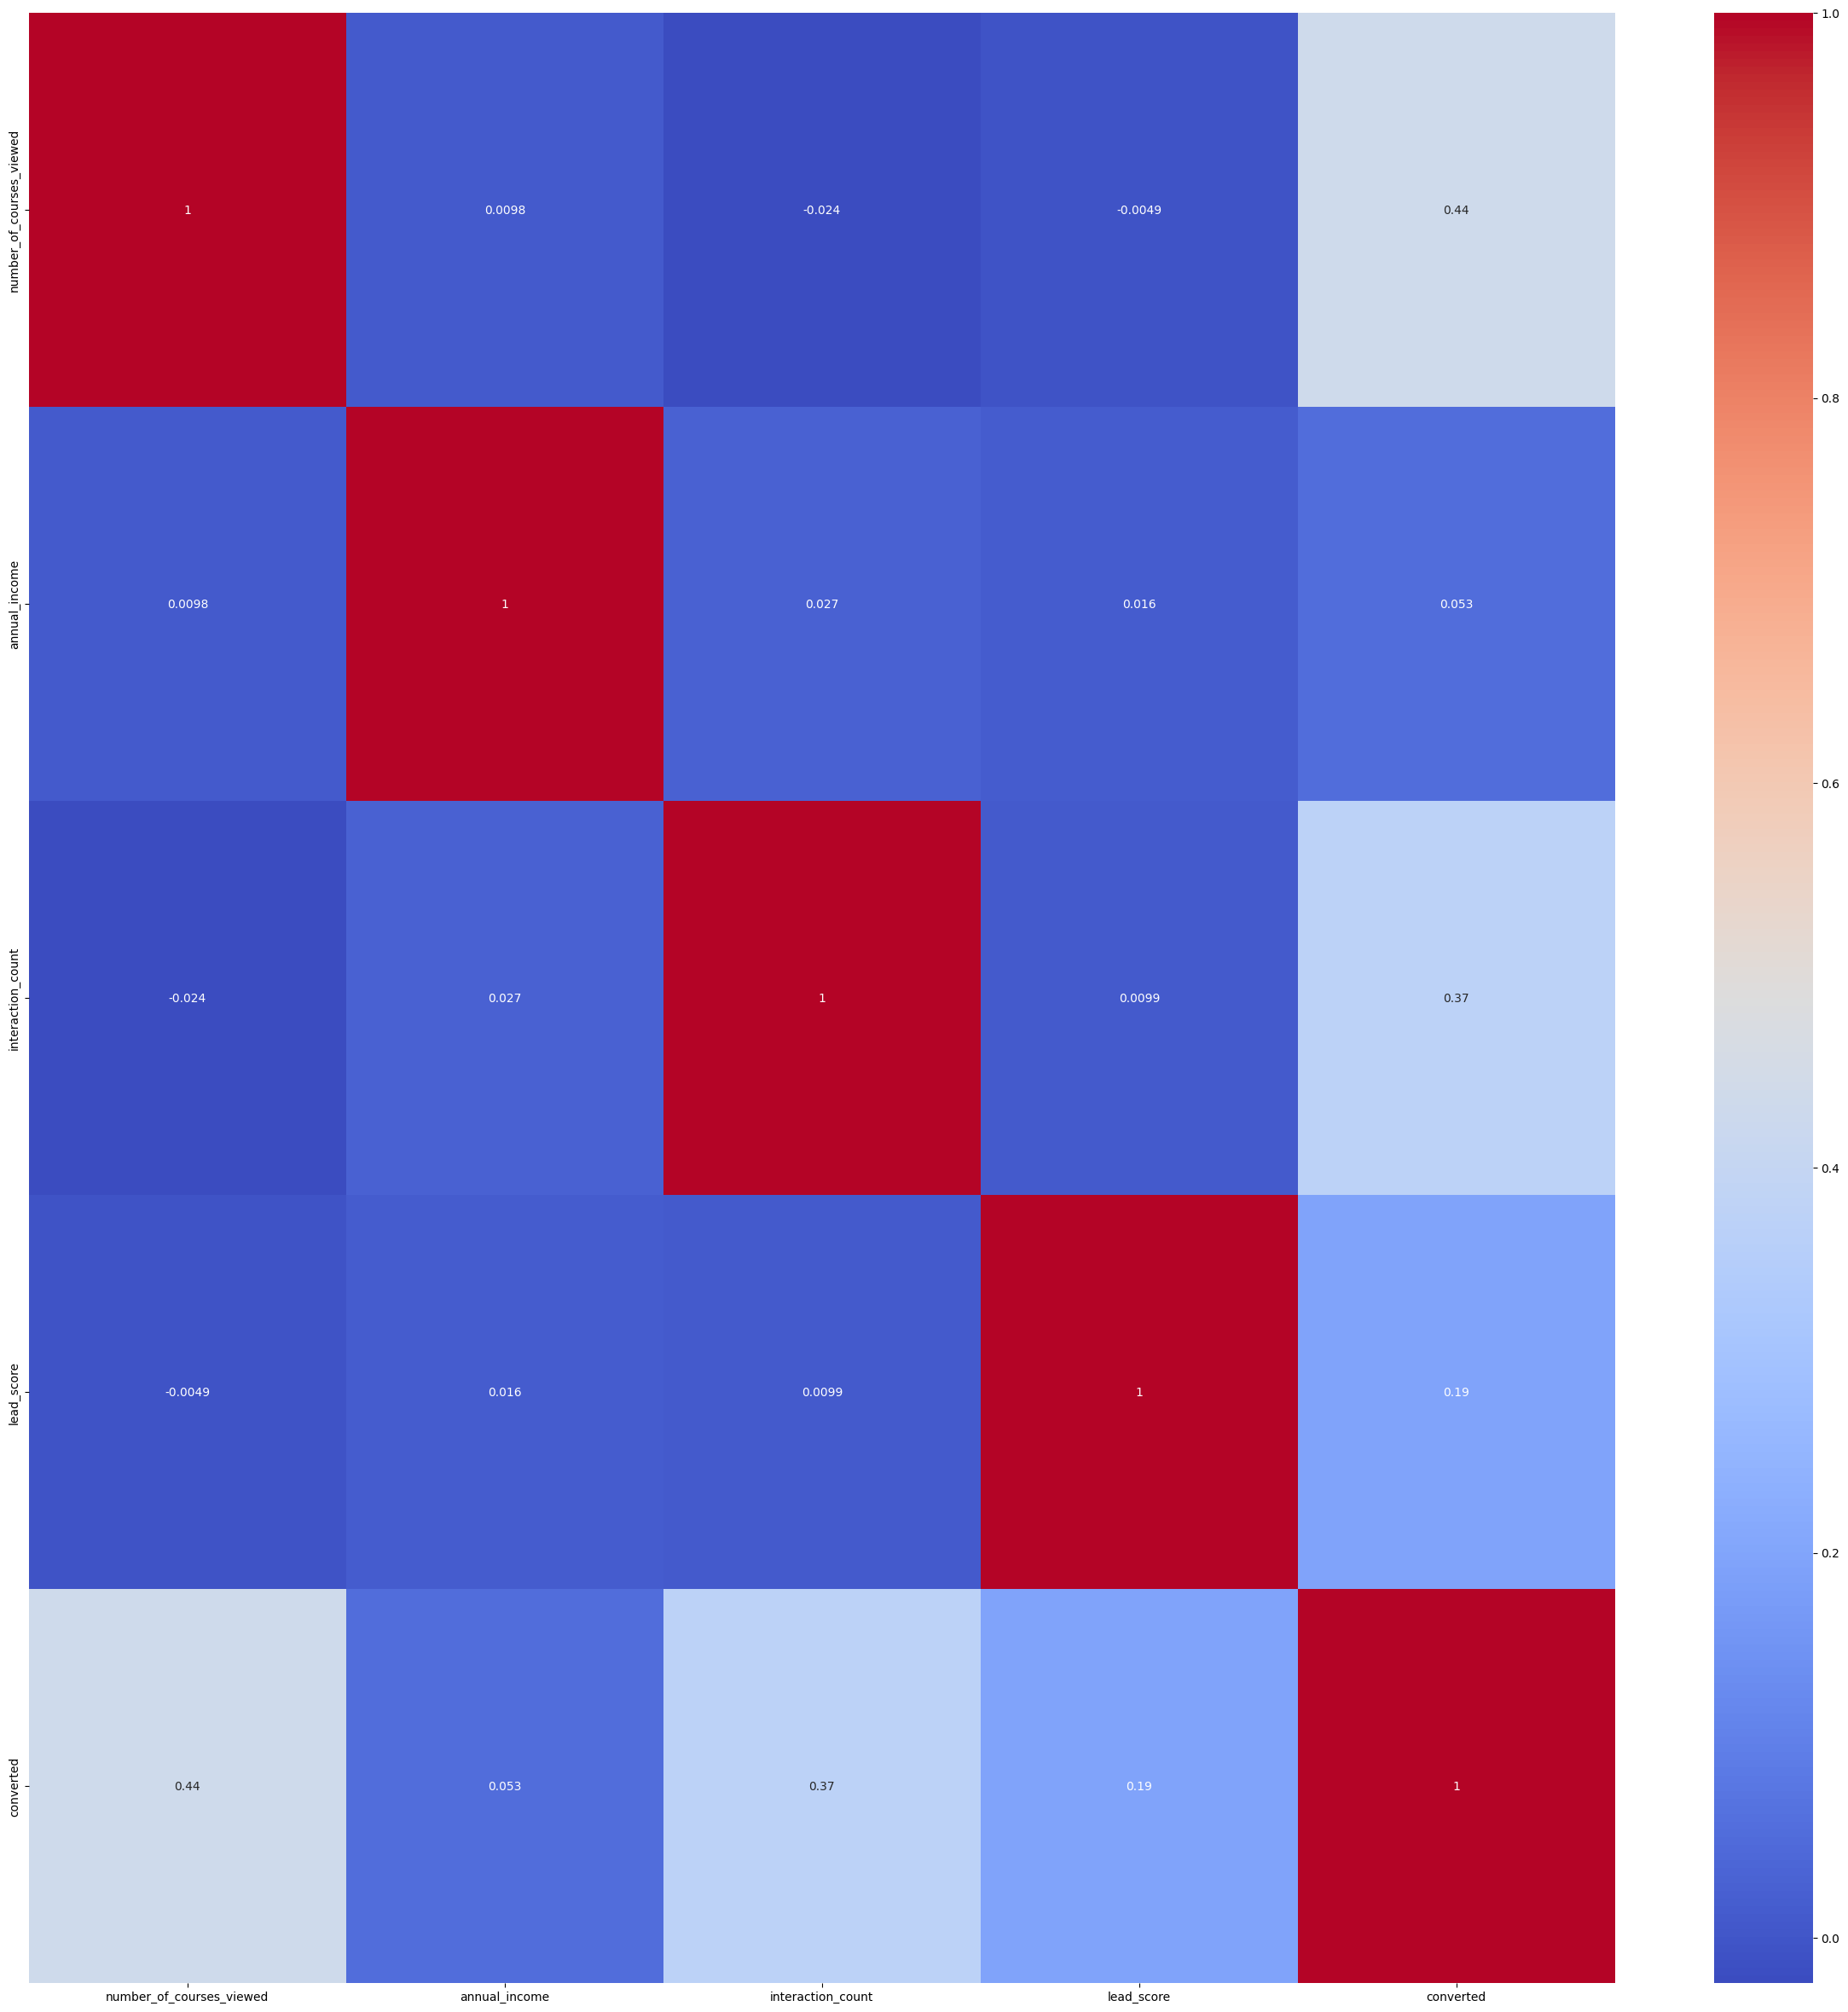

In [14]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
len(df_full_train), len(df_test)

(1169, 293)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [22]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source` [X]
- `employment_status`

In [23]:
from sklearn.metrics import mutual_info_score

In [24]:
for category in categorical_columns:
    mi_score = mutual_info_score(df_full_train[category], df_full_train.converted)
    print(f"{category.capitalize()} mutual information score: {mi_score:.2f}")
    print()

Lead_source mutual information score: 0.03

Industry mutual information score: 0.01

Employment_status mutual information score: 0.01

Location mutual information score: 0.00



### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74 [X]
- 0.84
- 0.94

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [26]:
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical_columns = list(df_train.dtypes[df_train.dtypes != 'object'].index)

In [27]:
train_dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical_columns + numerical_columns].to_dict(orient='records')

X_val = dv.fit_transform(val_dicts)

In [28]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred_val = model.predict_proba(X_val)[:, 1]
converted_pred = (y_pred_val >= 0.5)
accuracy = (y_val == converted_pred).mean().round(2)
accuracy


np.float64(0.7)

### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'` [X]
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.


In [29]:
df_val

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,healthcare,3,52220.0,unemployed,europe,1,0.07
1,organic_search,technology,3,59656.0,unemployed,middle_east,4,0.65
2,events,manufacturing,0,57134.0,self_employed,north_america,4,0.13
3,events,other,0,0.0,NA,asia,0,0.03
4,referral,retail,1,54103.0,unemployed,south_america,3,0.16
...,...,...,...,...,...,...,...,...
288,social_media,healthcare,1,55222.0,self_employed,africa,1,0.25
289,paid_ads,NA,1,20326.0,employed,middle_east,3,0.81
290,organic_search,technology,1,74166.0,employed,south_america,2,0.01
291,organic_search,technology,2,39103.0,self_employed,africa,3,0.60


In [30]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98
...,...,...,...,...,...,...,...,...
871,organic_search,other,1,43907.0,employed,australia,4,0.33
872,social_media,retail,3,64969.0,employed,north_america,1,0.18
873,NA,education,3,89042.0,employed,asia,4,0.75
874,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65


In [43]:
initial_accuracy = accuracy

features = list(df_train.columns)
diffs = []

for feature in features:
    # print(f"Feaures: {features}, No of Elements: {len(features)}")
    df_train_one_elim = df_train.drop(columns=[feature])
    # print(f"df_train_one_elim columns: {list(df_train_one_elim.columns)}, No of Elements: {len(list(df_train_one_elim.columns))}")
    df_val_one_elim = df_val.drop(columns=[feature])
    # print(f"df_val_one_elim columns: {list(df_val_one_elim.columns)}, No of Elements: {len(list(df_val_one_elim.columns))}")

    reduced_features = [f for f in features if f != feature]
    # print(reduced_features, len(reduced_features))

    train_dicts = df_train_one_elim[reduced_features].to_dict(orient='records')
    X_train_one_elim = dv.fit_transform(train_dicts)
    # print(dv.get_feature_names_out())

    val_dicts = df_val_one_elim[reduced_features].to_dict(orient='records')
    X_val_one_elim = dv.fit_transform(val_dicts)
    # print(dv.get_feature_names_out())

    model.fit(X_train_one_elim, y_train)
    y_pred_reduced = model.predict(X_val_one_elim)
    acc_one_elim = (y_val == y_pred_reduced).mean()
    
    diff = initial_accuracy - acc_one_elim
    diffs.append((feature, diff))
    print(diffs)

diffs.sort(key=lambda x: abs(x[1]))

Feaures: ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score'], No of Elements: 8
df_train_one_elim columns: ['industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score'], No of Elements: 7
df_val_one_elim columns: ['industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score'], No of Elements: 7
['industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score'] 7
[('lead_source', np.float64(-0.0030716723549488734))]
Feaures: ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_count', 'lead_score'], No of Elements: 8
df_train_one_elim columns: ['lead_source', 'number_of_courses_viewed', 'annual_income', 'employment_status', 'location', 'interaction_coun

In [32]:
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score']

In [33]:
diffs

[('industry', np.float64(0.0003412969283276279)),
 ('lead_source', np.float64(-0.0030716723549488734)),
 ('employment_status', np.float64(0.003754266211604018)),
 ('lead_score', np.float64(-0.006484641638225264)),
 ('location', np.float64(-0.009897610921501765)),
 ('number_of_courses_viewed', np.float64(0.14368600682593857)),
 ('interaction_count', np.float64(0.14368600682593857)),
 ('annual_income', np.float64(-0.1532423208191127))]

### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01 [X]
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [48]:
c_values = [0.01, 0.1, 1, 10, 100]

results = {}

for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred_val = model.predict_proba(X_val)[:, 1]
    converted_pred = (y_pred_val >= 0.5)
    c_accuracy = (y_val == converted_pred).mean()

    results[c] = c_accuracy.round(3)

In [49]:
results

{0.01: np.float64(0.7),
 0.1: np.float64(0.7),
 1: np.float64(0.7),
 10: np.float64(0.7),
 100: np.float64(0.7)}

## Submit the results

- Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
- If your answer doesn't match options exactly, select the closest one